In [1]:
from utils import *
from transform import *

In [2]:
open("UrbanSound8K/audio/fold5/6508-9-0-1.wav")

<_io.TextIOWrapper name='UrbanSound8K/audio/fold5/6508-9-0-1.wav' mode='r' encoding='cp1252'>

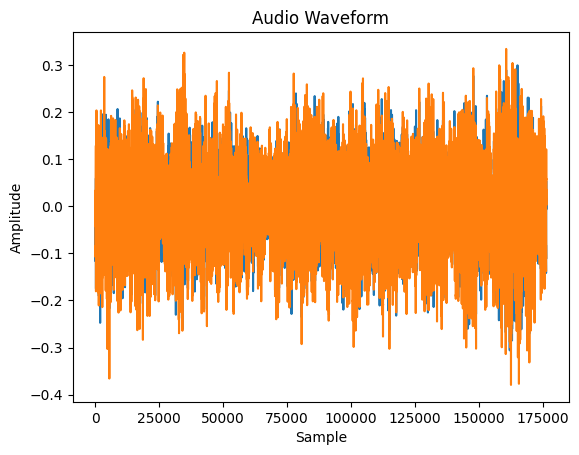

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys

waveform, sample_rate = AudioUtil.open(r'UrbanSound8K/audio/fold5/6508-9-0-6.wav')

# Plot the waveform
plt.plot(waveform.t().numpy())
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Audio Waveform')
plt.show()